## Manualify.ai
---
`Claude GenAI App - Manualify: A Smart AI for Answering Tutorial Questions from RAG, LLM, docs`

`Manualify.ai:` A Smart AI for Answering Questions from Tutorials: Harnessing the Power of RAG LLMs and Documents.

The objective is to develop an AI capable of answering questions by harnessing information from websites, tutorials, ServiceNow, customer support resources, and transactional databases.

**Author:** Amit Shukla

**Connect**
Author: Amit Shukla

[https://github.com/AmitXShukla](https://github.com/AmitXShukla)

[https://x.com/ashuklax](https://x.com/AShuklaX)

[https://youtube.com/@Amit.Shukla](https://youtube.com/@Amit.Shukla)

---

In this blog, we will create an online manual for Python, Oracle or Julia Lang, Angular and Flutter.

**Step 0:** getting started

**Step 1:** build a simple web crawler - Scrapify
    
In this section, we will

1. query LLM API and build a Q&A from LLM.
2. read data from PDF files and then query LLM.
3. Scape an online page and query LLM.
4. automated crawling: build a simple `web crawler` to gather text from the website. The crawler will collect links from the given domain and then visit each link to download the associated text. 
5. explore various options for downloading data from Single Page Applications (SPAs) using web scraping techniques and libraries such as BeautifulSoup, Scrapy, and Selenium.
6. Image data extraction:
look into different methods for extracting data from images, including Optical Character Recognition (OCR) techniques and libraries such as Tesseract.
7. read data from PDF files: Additionally, we will examine ways to read and extract data from PDF files using libraries such as PyPDF2 and PDFMiner.
8. Querying Language Models (LLMs):
Once we have extracted the data, we will then query the Language Models (LLMs) with the extracted data to generate insights and answers.

**Step 2:** We will convert all PDFs to csv and simply build a Q&A prompt using Gen AI (Claude) with entire file content at once.

**Step 3:** Creating Embedding from csvs and other documents to create a Vector database.

**Step 4:** Using RAG and LLMs to query manual documments.

**Step 5:** Using SQL queries with Functional calling.

**Step 6:** creating an online app and hosting

## Steps to create Manualify

---
<!-- gitGraph TB:
    commit id: "query" tag: "build prompt"
    commit id: "1"
    branch Query
    commit id: "2" tag: "LLM"
    branch PDFQuery
    commit id: "3" tag: "send PDF as sontext"
    branch OnlineScapping
    commit id: "4" tag: "online content as context"
    branch AutoScapping
    commit id: "5" tag: "auto online download"
    branch EmbeddingsVectorDB
    commit id: "6" tag: "embeddings Vector DB"
    branch RAG
    commit id: "7" tag: "query RAG"
    branch SQLQueries
    commit id: "8" tag: "query RDBMs"
    branch FunctionCalling
    commit id: "9" tag: "Function Calling" -->

`Steps to create Manualify`

![Process Flow](../images/processflow.png)

## Process Flow diagram
---

`Brief overview of the RAG stack : Voyage AI`

![Brief overview of the RAG stack : Voyage AI](https://files.readme.io/ec25408-RAG-white.png)

The diagram below illustrates the high-level architecture and data flow of this project. Please note that **not** all of these features are included in the Community version, and the Pro/Custom version may vary significantly from this diagram based on individual implementation.

As depicted in the diagram, this basic web crawler accepts a URL as input and navigates through all linked sub-pages, collecting text from the specific website one page at a time.
Our current goal is straightforward: we aim to extract relevant text information, metadata and other useful details using this crawler. In subsequent blogs, we plan to construct an embedding vector data store or a vector database composed of embeddings derived from the text of the website and other available documentation and knowledge bases.

Now let's proceed to construct our simple web crawler that fetches text and pertinent information from all pages of a given website.

![Process Flow](../images/process_flow.png)

## Step 0: Getting Started
---
Let's first set up our Python working environment. While we can also use Node.js, please note that for the current version, we will be using Python for development. 

Please signup and get your own API Keys.
- [ANTHROPIC_API_KEY](https://docs.anthropic.com/claude/reference/getting-started-with-the-api)
- [YOUR_PINECONE_API_KEY](https://docs.pinecone.io/docs/quickstart)
- [VOYAGE_API_KEY](https://docs.voyageai.com/docs/api-key-and-installation)

Later in the development process, I plan to use Node.js for deployment. While both Python and Node.js are simple and viable options for development and deployment, I find Node.js deployment to be easier than Python.

In [4]:
##########################################################################
## Although not mandatory, 
## it is highly recommended to set up a new Python working environment. ##
##########################################################################
## To create a virtual environment called `GenAI`, follow the steps:

## On Windows: 
# !python -m venv GenAI GenAI\Scripts\activate

## On macOS or Linux: 
# !python3 -m venv GenAI source GenAI/bin/activate

## Then, install required packages using pip: 
# !pip install pandas numpy matplotlib seaborn tqdm beautifulsoup4

## install only in case if you are using OpenAI
# !pip install openai

## install only in case if you are using Claude
# !pip install anthropic datasets pinecone-client voyageai

## in case if you fork this repo, just run
# !pip install -r requirements.txt

# !pip install --upgrade pip
# !pip freeze > requirements.txt

In [1]:
import platform;
print(platform.processor())

import os

####################################################
## if you are using OpenAI LLMs
## setup windows environment variable OPENAI_API_KEY
####################################################
# import openai
# openai.api_key = os.getenv("OPENAI_API_KEY")

####################################################
## if you are using Anthropic Claude LLMs
## sign up for API keys & setup windows environment variable 
## ANTHROPIC_API_KEY, PINECONE_API_KEY & VOYAGE_API_KEY
####################################################
# import anthropic

if (not os.environ.get("ANTHROPIC_API_KEY")) | (not os.environ.get("PINECONE_API_KEY")) | (not os.environ.get("VOYAGE_API_KEY")):
    print("One of the api key is missing.")
else:
    print("All API Keys are in place.")

Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
All API Keys are in place.


## Step 1: build a simple web crawler - Scrapify
---

### Step 1.1: query LLM API and build Q&A system

In this step, While the LLM's responses currently rely solely on its knowledge, we aim to make the most of the LLM by inputting provided data as input, enabling it to learn and use this data to answer questions more accurately.

In [ ]:
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    # you don't need to pass api_key explicitly
    api_key=os.environ.get("ANTHROPIC_API_KEY")
)

message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1000,
    temperature=0.0,
    system="Respond only in Yoda-speak.",
    messages=[
        {"role": "user", "content": "how are args and keyword arguments defined in python?"}
    ]
)

print(message.content)

### Step 1.2: read data from PDF files and then query LLM

As demonstrated in the previous steps, manual data input is currently required to serve as input and generate answers. In this case, we will use a PDF such as manual or tutorial as reference to query.

In [ ]:
# !pip install pypdf
# !curl -O https://github.com/AmitXShukla/RPA/blob/main/SampleData/The%20Ultimate%20Guide%20to%20Data%20Wrangling%20with%20Python%20-%20Rust%20Polars%20Data%20Frame.pdf

In [ ]:
from pypdf import PdfReader

reader = PdfReader("../downloads/Python - understanding functions.pdf")
number_of_pages = len(reader.pages)
text = ''.join([page.extract_text() for page in reader.pages])
print(text[:2155])

from anthropic import Anthropic
client = Anthropic()
MODEL_NAME = "claude-3-opus-20240229"

def get_completion(client, prompt):
    return client.messages.create(
        model=MODEL_NAME,
        max_tokens=2048,
        messages=[{
            "role": 'user', "content":  prompt
        }]
    ).content[0].text

# f"""Here is an academic paper: <paper>{text}</paper>

completion = get_completion(client,
    f"""Here is a local guide: <guide>{text}</guide>    

Please do the following:
1. Summarize the abstract about Python args 
and keyword args understanding at a kindergarten reading level. (In <kindergarten_abstract> tags.)
2. Write the Methods section as a recipe from the Moosewood Cookbook. (In <moosewood_methods> tags.)
"""
)
print(completion)

### Step 1.3: Scrape an online page and query LLM

In this step, we will construct a basic web crawler that will download text from a specified URL, using this downloaded text as input. By automating this process, we aim to eliminate the need for manual data input.

In [ ]:
# !pip install anthropic requests beautifulsoup4

In [3]:
USER_QUESTION="how are args and keyword arguments defined in python?"

In [4]:
GENERATE_QUERIES=f"""\n\nHuman: You are an expert at Python programmer. 
Your proficiency in Python programming is exceptional.
You have the ability to craft code, author blogs, and create tutorials. 
Typically, when a question is posed to you, your response is comprehensive and often includes illustrative code examples.

User question: {USER_QUESTION}

Format: {{"queries": ["query_1", "query_2", "query_3"]}}\n\nAssistant: {{"""

In [ ]:
import anthropic

client = anthropic.Anthropic(api_key=os.environ.get("ANTHROPIC_API_KEY"))

# define generic function to query LLM
def get_completion(prompt: str):
    message = client.completions.create(
        model='claude-2.1',
        max_tokens_to_sample=1024,
        temperature=.5,
        prompt=prompt
    )
    return message.completion

# query LLM based on fixed text
queries_json = "{" + get_completion(GENERATE_QUERIES)
print(queries_json)

In [ ]:
# import requests
# from time import sleep
# import json

# def get_search_results(search_query : str):
#     headers = {"Accept": "application/json", "X-Subscription-Token": BRAVE_API_KEY}
#     response = requests.get(
#         "https://api.search.brave.com/res/v1/web/search",
#         params={"q": search_query,
#                 "count": 3 # Max number of results to return
#                 },
#         headers=headers,
#         timeout=60
#     )
#     if not response.ok:
#         raise Exception(f"HTTP error {response.status_code}")
#     sleep(1) # avoid Brave rate limit
#     return response.json().get("web", {}).get("results")
# queries = json.loads(queries_json)["queries"]

# urls_seen = set()
# web_search_results = []
# for query in queries:
#     search_results = get_search_results(query)
#     for result in search_results:
#         url = result.get("url")
#         if not url or url in urls_seen:
#             continue
        
#         urls_seen.add(url)
#         web_search_results.append(result)
        
# print(len(web_search_results))

In [ ]:
# for i, item in enumerate(web_search_results):
#     print(f"Search result {i+1}:")
#     print(item.get("title"))
#     print(item.get("url"))

In [6]:
import requests
from bs4 import BeautifulSoup

url = "https://docs.python.org/3/tutorial/controlflow.html#more-on-defining-functions"

def get_page_content(url : str) -> str:
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text(strip=True, separator='\n')

In [ ]:
# formatted_search_results = "\n".join(
#         [
#             f'<item index="{i+1}">\n<source>{result.get("url")}</source>\n<page_content>\n{get_page_content(result.get("url"))}\n</page_content>\n</item>'
#             for i, result in enumerate(web_search_results)
#         ]
#     )
# print(formatted_search_results)

# query LLM based on text from a webpage
formatted_search_results = get_page_content(url)
print(formatted_search_results)

In [ ]:
# inject search results into prompt

# ANSWER_QUESTION = f"""\n\nHuman: I have provided you with the following search results:
# {formatted_search_results}

# Please answer the user's question using only information from the search results. Reference the relevant search result urls within your answer as links. Keep your answer concise.

# User's question: {USER_QUESTION} \n\nAssistant:
# """
# print(ANSWER_QUESTION)

ANSWER_QUESTION = f"""\n\nHuman: I have provided you with the following search results:
{formatted_search_results}

Please answer the user's question using only information from the search results. Reference the relevant search result urls within your answer as links. Keep your answer concise.

User's question: {USER_QUESTION} \n\nAssistant:
"""
print(ANSWER_QUESTION)

In [ ]:
print(get_completion(ANSWER_QUESTION))

### Step 1.4: Scrapify: build a simple `web crawler`

Now, since We can build and automate text retreival from one HTML page, we will build a simple `web crawler` to gather text from the website. The crawler will collect links from the given domain and then visit each link to download the associated text.

In [ ]:
#############################################################################
# credit: majority of this code is reference through OpenAI documentation
# however, it's not necessary to use OpenAI API
# like in this blog, we will Claude instead
# https://platform.openai.com/docs/tutorials/web-qa-embeddings
#############################################################################

# install dependencies
# !pip install requests pandas beautifulsoup4 tiktoken openai

# some of embedding packages were not working so tried downgrading openai version
# from openai.embeddings_utils import distances_from_embeddings, cosine_similarity
# !pip install openai==0.27.7

# !pip show openai

In [7]:
# import all packages
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os
import pandas as pd
# import tiktoken
# import openai
import numpy as np
# from openai.embeddings_utils import distances_from_embeddings, cosine_similarity
from ast import literal_eval

In [14]:
# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]{0,1}://.+$'

# Regex pattern to match a Phone number
PHONE_PATTERN = r'^http[s]{0,1}://.+$'

# Regex pattern to match an email
EMAIL_PATTERN = r'^http[s]{0,1}://.+$'

# Define OpenAI api_key
# openai.api_key = '<Your API Key>'

# Define root domain to crawl
domain = "angular.io"
full_url = "https://angular.io/tutorial/first-app/first-app-lesson-08"

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

In [9]:
# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

In [10]:
# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif (
                link.startswith("#")
                or link.startswith("mailto:")
                or link.startswith("tel:")
            ):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))

In [16]:
def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress
        
        # Try extracting the text from the link, if failed proceed with the next item in the queue
        try:
            # Save text from the url to a <url>.txt file
            with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w", encoding="UTF-8") as f:

                # Get the text from the URL using BeautifulSoup
                soup = BeautifulSoup(requests.get(url).text, "html.parser")

                # Get the text but remove the tags
                text = soup.get_text()

                # If the crawler gets to a page that requires JavaScript, it will stop the crawl
                if ("You need to enable JavaScript to run this app." in text):
                    print("Unable to parse page " + url + " due to JavaScript being required")
            
                # Otherwise, write the text to the file in the text directory
                f.write(text)
        except Exception as e:
            print("Unable to parse page " + url)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://angular.io/tutorial/first-app/first-app-lesson-08


### Step 1.5: Scrapify: Crawling SPAs as screenshots

Although previous steps works fine for static content website, it often fails to scrape data from dynamic and single page app (SPAs) webpages. In this case, we will convert these pages to screenshot.

First step is to [download chrome web-driver](https://chromedriver.chromium.org/downloads). Please make sure, web-driver version matches with your chrome version.

(Open Chrome -> Help -> About chrome -> check version).

download appropriate version depending on machine OS and unzip/extract to a local folder.

In [ ]:
# !pip install Pillow
# !pip install selenium

In [ ]:
from selenium import webdriver
from PIL import Image

# Define the URL of the web page we want to screenshot

url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch'

# Define the path to the webdriver executable (e.g., chromedriver.exe)

# webdriver_path = '/path/to/webdriver/executable'
webdriver_path = 'C:\amit.la\WIP\RPA\downloads\chromedriver.exe'

# Set up the webdriver

options = webdriver.ChromeOptions()
options.headless = True # Run the browser in headless mode to prevent a window from popping up
driver = webdriver.Chrome(executable_path=webdriver_path, options=options)

# Load the web page

driver.get(url)

# Take a screenshot of the entire page

# screenshot = driver.find_element_by_tag_name('body').screenshot_as_png
screenshot = driver.save_screenshot('../downloads/screenshot.png')

# Close the webdriver

driver.quit()

# Save the screenshot to a file

# with open('../SampleData/screenshot.png', 'wb') as file:
#     file.write(screenshot)

# Open the screenshot with Pillow to display it (optional)

img = Image.open('../downloads/screenshot.png')
img.show()

In [ ]:
import os
urls = {
        "AAPL.png": "https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch",
        "ORCL.png": "https://finance.yahoo.com/quote/ORCL?p=ORCL&.tsrc=fin-srch",
        "TSLA.png": "https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch",
        "GOOG.png": "https://finance.yahoo.com/quote/GOOG?p=GOOG&.tsrc=fin-srch",
        "MSFT.png": "https://finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch"
    }

In [ ]:
def takeScreenshots(outputFileName, url):
    driver.get(url)
    driver.save_screenshot(os.path.join('../downloads/',outputFileName))

In [ ]:
for key,value in urls.items():
    takeScreenshots(key, value)

### Step 1.6: Scrapify: read Image and query LLM

In this step, we will finally learn to read data from images and build our knowledge base.

To read text from images using Tesseract OCR in Python, we can use the pytesseract library, which is a Python wrapper for the Tesseract OCR engine. Here's an example code snippet:

[download tesseract here](https://tesseract-ocr.github.io/tessdoc/#binaries)

`Note that Tesseract OCR is not perfect and may not be able to extract text accurately from all images.`

In [ ]:
# py -m pip install pytesseract
# py -m pip install PIL

In [ ]:
from PIL import Image
img = Image.open('../downloads/AAPL.png')
img.show()

# make sure, you have tesseract included in your environment path

import os
os.getenv("tesseract")

In [ ]:
import pytesseract
from PIL import Image

##############################################################################
# in case if tesseract is not included in PATH
pytesseract.pytesseract.tesseract_cmd = r'C:\amit.la\WIP\RPA\downloads\ts\tesseract.exe'
##############################################################################

def read_image_text(image_path):
    """
    Reads text from an image file using Tesseract OCR.

    Args:
        image_path (str): The file path to the input image.

    Returns:
        str: The extracted text from the image.
    """
    # Load the image file
    image = Image.open(image_path)

    # Use Tesseract OCR to extract the text from the image
    text = pytesseract.image_to_string(image)

    return text

# Example usage
image_path = "../downloads/medical_form.png"
# image_path = "../downloads/email.png"
# image_path = "../downloads/vaccine.png"
# image_path = "../downloads/blurry_1.png"
# image_path = "../downloads/blurry_2.png"
text = read_image_text(image_path)
print(text)

In [ ]:
images = {
        "AAPL": "../downloads/AAPL.png",
        "ORCL": "../downloads/ORCL.png",
        "TSLA": "../downloads/TSLA.png",
        "GOOG": "../downloads/GOOG.png",
        "MSFT": "../downloads/MSFT.png"
    }

for key,value in images.items():
    # print(key, value)
    text = read_image_text(value)
    print(text)

## Step 2: convert all PDFs | texts to one csv
---
In this step, We will convert all PDFs/text files to one csv and simply build a Q&A prompt using Gen AI (Claude) with entire file content at once. As one big csv can be too much data to input, we will split big csv into smaller csvs.

In [23]:
# remove new lines function converts all new line and tab chars to space
def remove_newlinechars(txt):
    txt = txt.str.replace('\n', ' ')
    txt = txt.str.replace('\\n', ' ')
    txt = txt.str.replace('  ', ' ')
    txt = txt.str.replace('  ', ' ')
    return txt

In [20]:
import pandas as pd
# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("../downloads/texts/"):

    # Open the file and read the text
    with open("../downloads/texts/" + file, "r", encoding="UTF-8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlinechars(df.text)
df.to_csv('../downloads/scraped.csv')
df.head()

# as you can see, we created one row in csv per txt file 
# i.e. chapter 3, 4 and 5 each has one row in csv

,fname,text
0,,. 3. An Informal Introduction to Python In the...
1,,. 4. More Control Flow Tools As well as the wh...
2,,. 5. Data Structures This chapter describes so...


## Step 3: Creating Embedding from csvs and other documents to create a Vector database.
---

Most of the API limit number of input tokens for embeddings. In this step, we will split rows into tokens.

In [ ]:
# !pip install tiktoken

   title                                               text  n_tokens
0    NaN  . 3. An Informal Introduction to Python In the...      4216
1    NaN  . 4. More Control Flow Tools As well as the wh...      8075
2    NaN  . 5. Data Structures This chapter describes so...      5690


<Axes: >

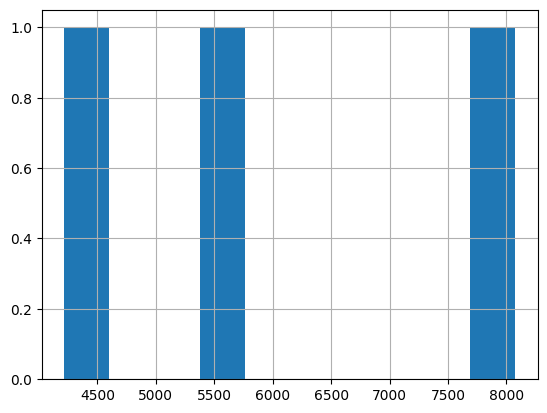

In [32]:
########################
# visualize text tokens
########################

import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('../downloads/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

print(df)
# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

# as you can see in below results
# Chapter 3, 4 & 5 has appx 4.2, 8 and 5.7k tokens
# this is expectecd, as Chapter as longest text

# now, we will need to further split these rows based on number of tokens
# because most of the vector databases have upper limits of # of tokens that can be stored

In [33]:
#####################################################################
# let's say we want to split csv into chunks of 500 tokens
#####################################################################

max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]

    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks


shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])

    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

                                                text  n_tokens
0  . 3. An Informal Introduction to Python In the...       495
1  To do floor division and get an integer result...       483
2  This includes characters “!”, words “rabbit”, ...       462
3  The following example: print("""\ Usage: thing...       453
4  While indexing is used to obtain individual ch...       416
(37, 2)


<Axes: >

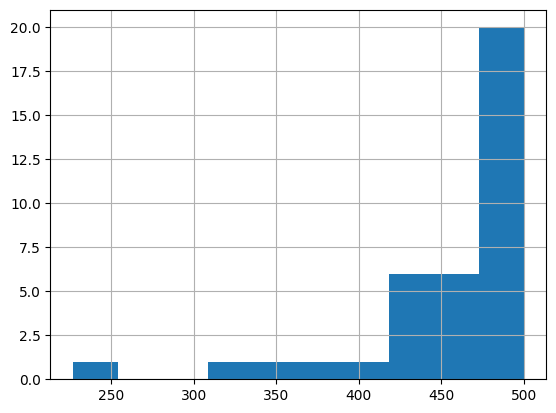

In [37]:
#####################################################################
# Visualizing the updated histogram again can help to confirm
# if the rows were successfully split into shortened sections.
#####################################################################

df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
print(df.head())
print(df.shape) # we had appx 18k tokens earlier, so we should expect ~35+ distributions of 500 each
df.n_tokens.hist()

#####################################################################
# as you can see from histogram
# most of rows have about 450-500 tokens each

In [21]:
#####################################################################
# now we have created tokens of text in equal chunks
# we are ready to create embeddings and store into vector database
# this is sample code to first test voyageai embeddings model
#####################################################################

# !pip install -U voyageai

# Then, you can create a client object and start using it to embed your texts:
import voyageai

vo = voyageai.Client()
# This will automatically use the environment variable VOYAGE_API_KEY.
# Alternatively, you can use vo = voyageai.Client(api_key="<your secret key>")

texts = ["Sample text 1", "Sample text 2"]

result = vo.embed(texts, model="voyage-2", input_type="document")
print(result.embeddings[0])
print(result.embeddings[1])

[-0.02412840537726879, 0.018993981182575226, 0.015429655089974403, 0.03032810427248478, -0.07588519901037216, -0.04830646887421608, 0.014070366509258747, 0.013044246472418308, -0.02055560238659382, 0.028754305094480515, -0.013207009993493557, 0.03885889798402786, -0.020923029631376266, 0.0061696176417171955, -0.035619620233774185, -0.02174042910337448, 0.00340257678180933, 0.004030129872262478, -0.02279907837510109, -0.026999060064554214, 0.004309683572500944, -0.012094165198504925, -0.009079143404960632, 0.025330478325486183, 0.024653639644384384, -0.004623811226338148, 0.033607009798288345, 0.012120068073272705, 0.027480129152536392, 0.017785698175430298, -0.01839103177189827, -0.0009876831900328398, 0.0174757931381464, 0.053816672414541245, 0.06095225363969803, -0.0008727280073799193, 0.01812352053821087, -0.03177871182560921, 0.017045531421899796, -0.01442217081785202, -0.06151377782225609, -0.02231586165726185, -0.012942302040755749, -0.031168006360530853, -0.010183855891227722, -

In [ ]:
# this code is similar to above step
# using curl to access voyageai embedding models

# curl https://api.voyageai.com/v1/embeddings \
#   -H "Content-Type: application/json" \
#   -H "Authorization: Bearer $VOYAGE_API_KEY" \
#   -d '{
#     "input": ["Sample text 1", "Sample text 2"],
#     "model": "voyage-2"
#   }'

In [48]:
df.text[:2].tolist()

2

In [49]:
#####################################################################
# now we have created tokens of text in equal chunks
# we are ready to create embeddings and store into vector database
# this is code to create embedding of our text
#####################################################################

import voyageai

vo = voyageai.Client()

# Embed the documents
doc_embds = vo.embed(
    df.text[:2].tolist(), model="voyage-2", input_type="document"
    # first embedding only 2 rows
    # change df.text[:2] to df.text to run it for all chunks
).embeddings

print(result.embeddings[0])
print(result.embeddings[1])

[-0.02412840537726879, 0.018993981182575226, 0.015429655089974403, 0.03032810427248478, -0.07588519901037216, -0.04830646887421608, 0.014070366509258747, 0.013044246472418308, -0.02055560238659382, 0.028754305094480515, -0.013207009993493557, 0.03885889798402786, -0.020923029631376266, 0.0061696176417171955, -0.035619620233774185, -0.02174042910337448, 0.00340257678180933, 0.004030129872262478, -0.02279907837510109, -0.026999060064554214, 0.004309683572500944, -0.012094165198504925, -0.009079143404960632, 0.025330478325486183, 0.024653639644384384, -0.004623811226338148, 0.033607009798288345, 0.012120068073272705, 0.027480129152536392, 0.017785698175430298, -0.01839103177189827, -0.0009876831900328398, 0.0174757931381464, 0.053816672414541245, 0.06095225363969803, -0.0008727280073799193, 0.01812352053821087, -0.03177871182560921, 0.017045531421899796, -0.01442217081785202, -0.06151377782225609, -0.02231586165726185, -0.012942302040755749, -0.031168006360530853, -0.010183855891227722, -

In [50]:
#####################################################################
# now since we have created embeddings of all our text
# we will need to create embedding of our query
# and then perform a similarity search to query our vector/text database
#####################################################################

query = "how are args and keyword arguments defined in python?"

import numpy as np

# Embed the query
query_embd = vo.embed(
    [query], model="voyage-2", input_type="query"
).embeddings[0]

# Compute the similarity
# Voyage embeddings are normalized to length 1, therefore dot-product
# and cosine similarity are the same.
# how to calculate distinace between embeddings
similarities = np.dot(doc_embds, query_embd)

retrieved_id = np.argmax(similarities)
print(df.text.tolist()[retrieved_id])

. 3. An Informal Introduction to Python In the following examples, input and output are distinguished by the presence or absence of prompts (>>> and …): to repeat the example, you must type everything after the prompt, when the prompt appears; lines that do not begin with a prompt are output from the interpreter. Note that a secondary prompt on a line by itself in an example means you must type a blank line; this is used to end a multi-line command. You can toggle the display of prompts and output by clicking on >>> in the upper-right corner of an example box. If you hide the prompts and output for an example, then you can easily copy and paste the input lines into your interpreter. Many of the examples in this manual, even those entered at the interactive prompt, include comments. Comments in Python start with the hash character, #, and extend to the end of the physical line. A comment may appear at the start of a line or following whitespace or code, but not within a string literal. 

## Step 4: Using RAG and LLMs to query manual documments.
---

Retrieval-Augmented Generation using Pinecone

This code below demonstrates how to connect Claude with the data in your Pinecone vector database through a technique called retrieval-augmented generation (RAG). We will cover the following steps:

    Embedding a dataset using Voyage AI's embedding model
    Uploading the embeddings to a Pinecone index
    Retrieving information from the vector database
    Using Claude to answer questions with information from the database

In [ ]:
# %pip install anthropic datasets pinecone-client voyageai

In [ ]:
############################################################
# Insert your API keys here
# we will assume that we have alreadys setup these API keys
# as environment variables
############################################################

# ANTHROPIC_API_KEY="<YOUR_ANTHROPIC_API_KEY>"
# PINECONE_API_KEY="<YOUR_PINECONE_API_KEY>"
# VOYAGE_API_KEY="<YOUR_VOYAGE_API_KEY>"

In [ ]:
# connecting to Pinecone Vector Database

from pinecone import Pinecone
pc = Pinecone(api_key=os.environ.get("PINECONE_API_KEY"))

from pinecone import ServerlessSpec

spec = ServerlessSpec(
    cloud="aws", region="us-west-2"
)

In [ ]:
import time

index_name = 'manualify' # must be all lowercase
existing_indexes = [
    index_info["name"] for index_info in pc.list_indexes()
]

# check if index already exists (it shouldn't if this is first time)
if index_name not in existing_indexes:
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=1024,  # dimensionality of voyage-2 embeddings
        metric='dotproduct',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
time.sleep(1)
# view index stats
# index.describe_index_stats()
print(index)

In [ ]:
from tqdm.auto import tqdm
from time import sleep

descriptions = df["text"][:2].tolist() # first run 2 sample rows
# uncomment this to run it for all embedding
# descriptions = df["text"].tolist()

batch_size = 100  # how many embeddings we create and insert at once

for i in tqdm(range(0, len(descriptions), batch_size)):
    # find end of batch
    i_end = min(len(descriptions), i+batch_size)
    descriptions_batch = descriptions[i:i_end]
    # create embeddings (try-except added to avoid RateLimitError. Voyage currently allows 300/requests per minute.)
    done = False
    while not done:
        try:
            res = vo.embed(descriptions_batch, model="voyage-2", input_type="document")
            done = True
        except:
            sleep(5)
            
    embeds = [record for record in res.embeddings]
    # create unique IDs for each text
    ids_batch = [f"description_{idx}" for idx in range(i, i_end)]
    
    # Create metadata dictionaries for each text
    metadata_batch = [{'description': description} for description in descriptions_batch]

    to_upsert = list(zip(ids_batch, embeds, metadata_batch))

    # upsert to Pinecone
    index.upsert(vectors=to_upsert)

In [ ]:
USER_QUESTION = "how are args and keyword arguments defined in python?"

question_embed = vo.embed([USER_QUESTION], model="voyage-2", input_type="query")
results = index.query(
            vector=question_embed.embeddings, top_k=5, include_metadata=True
        )
results

In [ ]:
###############################
# # optimizing search results
###############################

# import anthropic

# client = anthropic.Anthropic()
# def get_completion(prompt):
#     completion = client.completions.create(
#         model="claude-2.1",
#         prompt=prompt,
#         max_tokens_to_sample=1024,
#     )
#     return completion.completion

# def create_keyword_prompt(question):
#     return f"""\n\nHuman: Given a question, generate a list of 5 very diverse search keywords that can be used to search for products on Amazon.

# The question is: {question}

# Output your keywords as a JSON that has one property "keywords" that is a list of strings. Only output valid JSON.\n\nAssistant:{{"""

# With our Anthropic client setup and our prompt created, we can now begin to generate keywords from the question. We will output the keywords in a JSON object so we can easily parse them from Claude's output.

# keyword_json = "{" + get_completion(create_keyword_prompt(USER_QUESTION))
# print(keyword_json)

# import json

# # Extract the keywords from the JSON
# data = json.loads(keyword_json)
# keywords_list = data['keywords']
# print(keywords_list)

# results_list = []
# for keyword in keywords_list:
#     # get the embeddings for the keywords
#     query_embed = vo.embed([keyword], model="voyage-2", input_type="query")
#     # search for the embeddings in the Pinecone index
#     search_results = index.query(vector=query_embed.embeddings, top_k=3, include_metadata=True)
#     # append the search results to the list
#     for search_result in search_results.matches:
#             results_list.append(search_result['metadata']['description'])
# print(len(results_list))

# # Formatting search results
# def format_results(extracted: list[str]) -> str:
#         result = "\n".join(
#             [
#                 f'<item index="{i+1}">\n<page_content>\n{r}\n</page_content>\n</item>'
#                 for i, r in enumerate(extracted)
#             ]
#         )
    
#         return f"\n<search_results>\n{result}\n</search_results>"

# def create_answer_prompt(results_list, question):
#     return f"""\n\nHuman: {format_results(results_list)} Using the search results provided within the <search_results></search_results> tags,

# answer = get_completion(create_answer_prompt(results_list, USER_QUESTION))
# print(answer)

## Step 5: Using SQL queries with Functional calling
---

This topic is covered in later blogs : [HelpDesk.ai app](./HelpDesk/src/HelpDesk.ipynb).

## Step 6: build, host online Flutter product app with LLM
---